<a href="https://colab.research.google.com/github/KJLumalang/ITBA-3206_Planeteers/blob/main/ITBA_3206_Planeteers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
pd.option_context('display.max_rows', None)
pd.option_context('display.max_columns', None)

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/KJLumalang/ITBA-3206_Planeteers/main/historical_emissions.csv')
df.head(200)
display(df)

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48939.71,47990.47,47413.95,46760.47,46647.29,...,34948.94,34929.19,35387.89,34068.91,33703.46,32977.47,32766.49,32670.32,32813.46,32645.91
1,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11705.81,11408.26,11207.66,11149.68,11155.76,...,4053.37,4103.23,3963.61,3954.75,3918.30,3528.81,3377.79,3154.54,3023.38,2873.71
2,United States,CAIT,Total including LUCF,All GHG,MtCO₂e,5794.35,5613.64,5676.92,5586.69,5711.15,...,6291.25,6293.80,6258.47,6010.62,5843.90,5782.20,5691.26,5583.80,5501.92,5543.47
3,India,CAIT,Total including LUCF,All GHG,MtCO₂e,3346.63,3202.82,3073.24,3002.17,2988.34,...,1460.24,1382.26,1348.09,1289.63,1240.44,1174.78,1128.44,1096.71,1064.49,1009.44
4,European Union (27),CAIT,Total including LUCF,All GHG,MtCO₂e,3333.16,3401.95,3387.97,3046.38,2990.49,...,3934.85,4008.29,4048.58,4126.40,4018.79,3968.32,3984.95,4058.11,4202.13,4279.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Kiribati,CAIT,Total including LUCF,All GHG,MtCO₂e,0.11,0.10,0.10,0.09,0.09,...,0.05,0.05,0.05,0.05,0.05,0.04,0.05,0.04,0.04,0.04
191,Cook Islands,CAIT,Total including LUCF,All GHG,MtCO₂e,0.10,0.09,0.09,0.08,0.08,...,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,0.03,0.03
192,Nauru,CAIT,Total including LUCF,All GHG,MtCO₂e,0.08,0.07,0.07,0.06,0.06,...,0.10,0.11,0.11,0.11,0.11,0.12,0.12,0.13,0.13,0.13
193,Tuvalu,CAIT,Total including LUCF,All GHG,MtCO₂e,0.03,0.03,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


**Finding cells with null values and replacing them with N/A**

In [65]:
df.isnull().sum()

Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           4
dtype: int64

**Showing the rows with null**

In [66]:
nan_rows  = df.loc[df.isna().any(axis=1)]
print(nan_rows)


              Country Data source                Sector      Gas    Unit  \
122           Namibia        CAIT  Total including LUCF  All GHG  MtCO₂e   
184             Palau        CAIT  Total including LUCF  All GHG  MtCO₂e   
186        Micronesia        CAIT  Total including LUCF  All GHG  MtCO₂e   
187  Marshall Islands        CAIT  Total including LUCF  All GHG  MtCO₂e   

      2018   2017   2016   2015   2014  ...   1999   1998   1997   1996  \
122  22.49  23.45  23.40  22.66  22.53  ...  20.66  20.62  19.89  20.04   
184   0.32   0.30   0.29   0.25   0.25  ...   0.22   0.22   0.22   0.21   
186   0.24   0.23   0.22   0.20   0.19  ...   0.17   0.17   0.16   0.16   
187   0.24   0.22   0.22   0.19   0.19  ...   0.13   0.13   0.12   0.12   

      1995   1994   1993   1992   1991  1990  
122  20.15  20.04  19.85  19.89  19.94   NaN  
184   0.21   0.21   0.21   0.21   0.01   NaN  
186   0.16   0.10   0.09   0.09  -0.02   NaN  
187   0.12   0.12   0.11   0.11   0.03   NaN  

[4 rows

**The 1990 column has 4 null values. Next thing to do is replace them with N/A**

In [67]:
nan_cols = df.loc[:,df.isna().any(axis=0)]
df.loc[df.isna().any(axis=1)].head(4)
df.fillna({'1990':'N/A'},  inplace=True)




 **Checking if there are no null cells anymore**

In [68]:
df.isnull().sum()

Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           0
dtype: int64

**Data is cleaned. Proceeding to analysis**

**************************************************************************

In [69]:
df_new=df.iloc[:,range(5,34)].copy()
df_new

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,48939.71,47990.47,47413.95,46760.47,46647.29,46047.13,45427.61,44891.40,44758.58,43029.01,...,34948.94,34929.19,35387.89,34068.91,33703.46,32977.47,32766.49,32670.32,32813.46,32645.91
1,11705.81,11408.26,11207.66,11149.68,11155.76,11144.76,10690.04,10364.83,9872.37,9046.19,...,4053.37,4103.23,3963.61,3954.75,3918.30,3528.81,3377.79,3154.54,3023.38,2873.71
2,5794.35,5613.64,5676.92,5586.69,5711.15,5690.79,5550.87,5796.78,6041.59,5793.66,...,6291.25,6293.80,6258.47,6010.62,5843.90,5782.20,5691.26,5583.80,5501.92,5543.47
3,3346.63,3202.82,3073.24,3002.17,2988.34,2816.49,2758.53,2610.32,2576.93,2467.78,...,1460.24,1382.26,1348.09,1289.63,1240.44,1174.78,1128.44,1096.71,1064.49,1009.44
4,3333.16,3401.95,3387.97,3046.38,2990.49,3136.34,3213.21,3274.40,3646.50,3566.88,...,3934.85,4008.29,4048.58,4126.40,4018.79,3968.32,3984.95,4058.11,4202.13,4279.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.11,0.10,0.10,0.09,0.09,0.09,0.08,0.08,0.08,0.08,...,0.05,0.05,0.05,0.05,0.05,0.04,0.05,0.04,0.04,0.04
191,0.10,0.09,0.09,0.08,0.08,0.08,0.08,0.08,0.07,0.07,...,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.03,0.03,0.03
192,0.08,0.07,0.07,0.06,0.06,0.05,0.05,0.05,0.05,0.05,...,0.10,0.11,0.11,0.11,0.11,0.12,0.12,0.13,0.13,0.13
193,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


[48939.71, 11705.81, 5794.35, 3346.63, 3333.16, 1992.08, 1703.86, 1420.58, 1154.72, 828.34, 776.61, 763.44, 695.26, 681.67, 673.08, 638.12, 619.26, 520.5, 473.87, 441.13, 438.22, 431.22, 395.5, 388.11, 386.78, 364.43, 361.37, 357.52, 356.74, 329.4, 313.06, 277.26, 271.23, 267.95, 263.24, 262.43, 234.82, 232.14, 231.62, 220.75, 219.11, 216.19, 204.67, 186.18, 179.99, 175.57, 130.64, 126.21, 125.08, 124.59, 123.33, 118.77, 117.03, 112.97, 110.07, 108.91, 105.06, 103.04, 99.83, 99.08, 95.29, 93.23, 92.35, 91.84, 87.92, 87.07, 86.14, 86.13, 82.32, 78.35, 71.21, 70.71, 70.71, 69.15, 68.49, 67.85, 67.15, 66.68, 66.67, 64.09, 62.81, 62.51, 62.29, 61.43, 57.45, 55.72, 54.96, 54.57, 51.77, 49.55, 48.95, 46.73, 46.35, 46.32, 46.3, 45.29, 44.32, 43.78, 43.74, 41.29, 41.17, 38.86, 38.82, 38.7, 38.67, 38.63, 37.5, 37.31, 37.15, 35.81, 34.39, 34.36, 34.28, 30.05, 28.42, 28.13, 28.12, 26.83, 25.45, 23.1, 23.03, 22.66, 22.49, 22.41, 21.76, 20.56, 20.29, 19.6, 19.52, 19.12, 18.21, 18.21, 17.51, 16.95, 

<function matplotlib.pyplot.show>

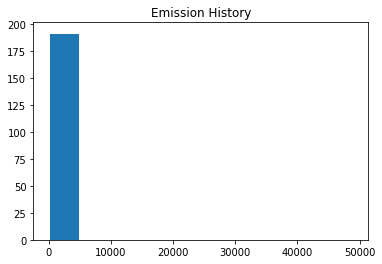

In [74]:
data_points = df ['2018'].tolist()
print(data_points)
n_bins=10
plt.xticks=(df['Country'])
fig, ax =  plt.subplots()
arr = ax.hist(data_points, ec='white', bins=n_bins)
plt.title("Emission History")
plt.show

In [ ]:
SortedData = data.sort_values(by='Country',ascending=True)
result= SortedData.head(10)
display(result)
